In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from module.pricing import MonteCarlo

In [2]:
st1 = 4700
st2 = 1.10
results = dict()
mc = MonteCarlo(num_path=5, num_simulation=20_000_000, num_path_per_year=1638)
for rho in np.linspace(start=-1, stop=1, num=20):
    eq, fx = mc.bivariate_gbm(
        st1=st1, iv1=0.13, q1=0, b1=0, 
        st2=st2, iv2=0.03, q2=0, b2=0, 
        r=0, rho=rho
    )
    eq = pd.DataFrame(eq)
    fx = pd.DataFrame(fx)
    strategy_pnl = (fx.iloc[-1] / fx.iloc[0] -1) * eq.iloc[-1]

    bump = 0.0001
    dpdfx = st1 * (st2+bump/st2 -1)/bump
    hedge_pnl = dpdfx * (fx.iloc[-1] - fx.iloc[0])
    bleed_n = (hedge_pnl-strategy_pnl)/eq.iloc[-1]
    results[rho] = bleed_n.mean()

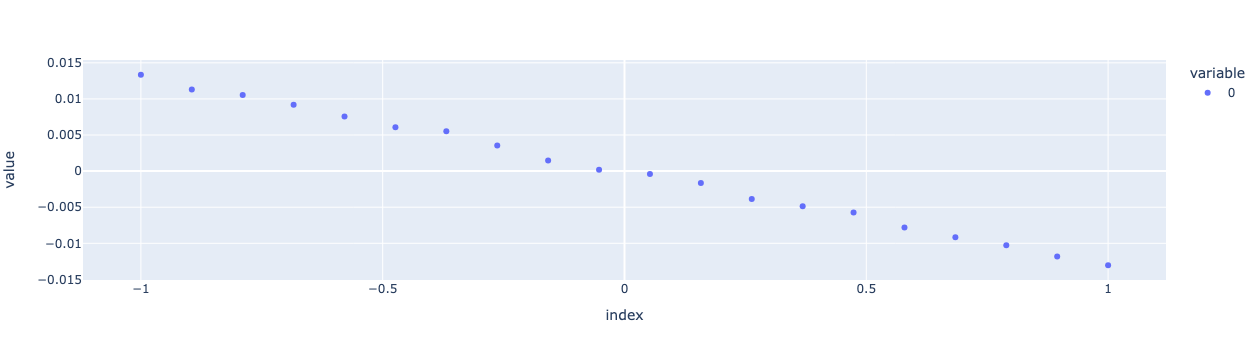

In [4]:
px.scatter(pd.Series(results))